In [ ]:
!pip install pandas
!pip install numpy
!pip install librosa
!pip install matplotlib
!pip install seaborn
!pip install tensorflow
!pip install tqdm
!pip install xgboost
!pip install scikit-learn
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade --force-reinstall tensorflow catboost numba

  Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl (99.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4

In [ ]:
import pandas as pd
import numpy as np
import librosa
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    LSTM,
    Bidirectional,
    Dropout,
    BatchNormalization,
    Dense,
    MaxPooling1D,
    concatenate,
    GlobalAveragePooling1D,
    Flatten,
)

from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from keras.models import save_model, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# data_file='/content/drive/MyDrive/extracted_features_new.csv'
data_file='/content/extractedfeatures13.csv'

In [ ]:
data_file

'/content/extractedfeatures13.csv'

In [ ]:
audio_data = pd.read_csv(data_file)

In [ ]:
label_encoder = LabelEncoder()
audio_data['LABEL'] = label_encoder.fit_transform(audio_data['LABEL'])

audio_data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,LABEL
0,0.559104,-0.662452,-0.400898,-0.043846,-0.227307,-0.735715,-0.399483,-0.266868,0.693023,-1.038253,0.822072,1.200096,0.950980,0.896088,-0.208060,0.424744,-1.073727,-0.477165,0.932230,1
1,0.882347,-0.389280,1.196464,1.294152,1.377501,0.937776,0.291074,0.073176,0.210550,0.048954,1.441982,-2.984278,-2.128574,2.187094,1.014428,0.074992,0.147875,-2.057343,0.160196,1
2,0.422563,0.089888,0.981910,1.211169,1.226106,0.481307,0.672814,-0.223605,0.631139,0.239428,-0.616987,-0.159399,0.297999,0.551236,-0.725384,-0.579287,-0.673090,0.237676,-0.493481,1
3,0.947609,-0.072744,1.034531,1.389490,1.120398,0.727914,0.245848,-0.281990,0.814991,-0.832639,-0.600568,0.730005,0.517567,-0.271325,-0.208221,-0.615762,-0.219451,-0.402461,0.351862,1
4,-0.236317,0.260871,0.377179,0.901997,0.551768,0.149124,0.461436,0.519771,0.712289,-1.112730,0.812435,-0.956307,0.556673,0.596842,0.410684,0.598921,-1.121525,-0.841521,-1.741485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25375,-0.198653,2.835466,-1.083300,-0.621522,-1.097309,-1.140111,1.236163,2.028140,0.241372,0.515237,-0.163843,1.979660,0.941218,-0.771149,0.037414,-0.117305,0.285338,0.213786,0.479062,0
25376,-1.898193,-0.698309,-1.660620,-2.028716,-1.821215,-1.013762,-1.240502,-0.609097,-1.057184,-1.347348,-0.782379,0.324625,0.467152,0.529804,0.573411,0.165536,1.010693,-0.144258,1.234647,0
25377,1.550319,0.355461,0.693509,0.696582,0.717348,0.411746,1.426213,2.392080,-1.407251,0.707734,0.573284,-0.094169,-0.193581,-1.893309,0.732056,0.741559,-1.093325,-1.432130,-3.229661,0
25378,-1.542308,-0.482283,-1.348724,-1.229270,-1.248704,-0.933885,-0.571529,-1.182610,0.168792,-1.484029,0.169492,-0.008876,1.216132,1.181769,0.808159,0.704532,-0.114252,0.319475,-0.094870,0


In [ ]:
y = audio_data['LABEL']
X = audio_data.drop('LABEL', axis = 1)

In [ ]:
real_df = audio_data[audio_data['LABEL'] == 1]
fake_df = audio_data[audio_data['LABEL'] == 0]

In [ ]:
len(real_df)

2580

In [ ]:
# Set n to the minimum available size
n_samples = min(len(real_df), len(fake_df))  # Ensures no sampling errors

# Perform sampling
real_df_downsampled = real_df.sample(n=n_samples, random_state=42)
fake_df_downsampled = fake_df.sample(n=n_samples, random_state=42)

print("Downsampled Real DataFrame Size:", len(real_df_downsampled))
print("Downsampled Fake DataFrame Size:", len(fake_df_downsampled))

# Combine the datasets and shuffle
balanced_audio_data = pd.concat([real_df_downsampled, fake_df_downsampled]).sample(frac=1, random_state=42)

# Split features and labels
X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=42)

# Print class distribution
print(y_train.value_counts(), y_test.value_counts())

Downsampled Real DataFrame Size: 2580
Downsampled Fake DataFrame Size: 2580
LABEL
0    2064
1    2064
Name: count, dtype: int64 LABEL
1    516
0    516
Name: count, dtype: int64


In [ ]:
real_df_downsampled

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,LABEL
809,0.848802,-0.161749,0.821126,1.250807,1.094045,0.313496,0.503247,0.021165,-0.068049,-0.468691,0.051649,0.843942,0.536094,0.952741,0.479661,-0.267890,-0.432001,0.783451,-0.567466,1
2356,0.360940,-0.002289,0.990307,0.443145,0.625227,1.457617,0.564266,-0.002751,-0.633271,-0.904621,-0.465316,0.769017,-0.831448,-0.505428,0.207779,1.104489,-0.454015,-0.220568,1.287872,1
761,1.086567,-0.399180,0.559411,0.584884,0.613357,0.141264,-0.032129,0.265852,-0.087793,-1.104454,0.620947,0.216966,0.071538,0.136750,0.095529,0.962956,0.267765,-1.433596,0.270751,1
318,-0.056651,-0.459304,-0.056264,0.371413,0.236585,-0.455113,-0.527586,-0.731848,1.811110,-0.650739,0.901446,0.629321,1.312057,0.819295,0.953347,0.634300,0.414553,0.081386,-0.023747,1
961,0.149605,-0.067934,-0.027147,0.702861,0.440611,-0.477219,-0.464509,-1.302167,1.050878,-0.470523,0.728756,0.815207,1.164142,1.049136,0.435440,-0.176455,-0.101981,0.308793,0.837128,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.679252,-0.419121,-0.797975,-0.736393,-0.727405,-0.628524,-0.610553,-0.318761,-0.233981,-1.172270,-0.039359,1.436567,0.442542,0.722805,0.604845,0.117500,0.211641,0.743230,0.572252,1
1095,0.307626,-0.466006,-0.363672,-0.148999,-0.006185,-0.896550,-0.515573,0.811667,-1.017141,0.209035,0.782249,0.527156,1.279594,-0.018795,1.673402,1.757676,1.258286,0.671414,0.335162,1
1130,1.135465,0.113364,0.777357,0.982664,0.962806,0.448295,0.088327,0.647159,-1.565768,0.766823,0.337605,-0.154941,0.219917,-0.184364,0.735441,0.434318,-0.514131,-0.732016,1.049486,1
1294,1.556475,0.732781,0.195261,0.850523,0.569461,-0.753498,1.370320,2.889247,-1.010148,1.230535,0.313907,-0.116227,1.420427,-0.513898,1.124621,0.995312,0.108590,2.301818,-0.420779,1


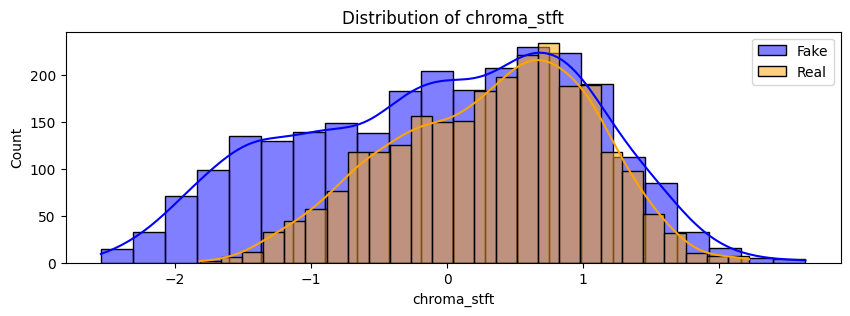

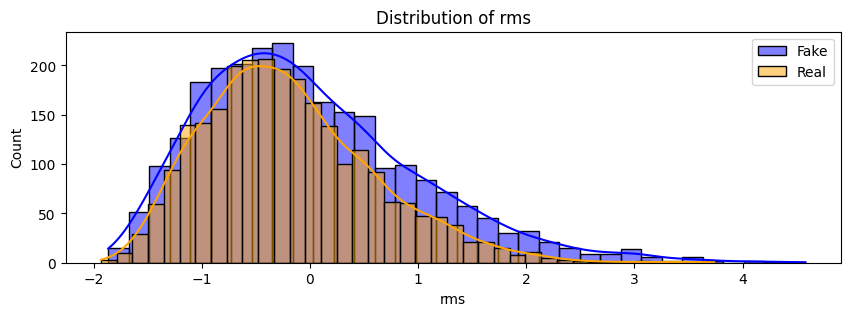

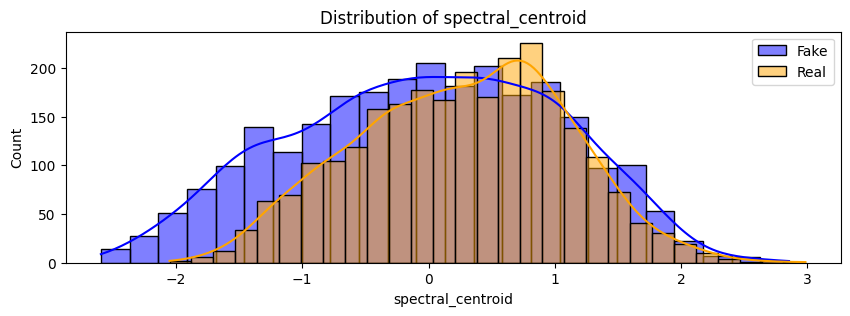

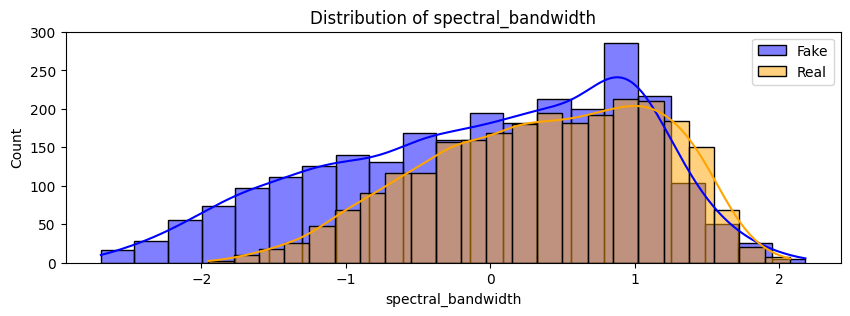

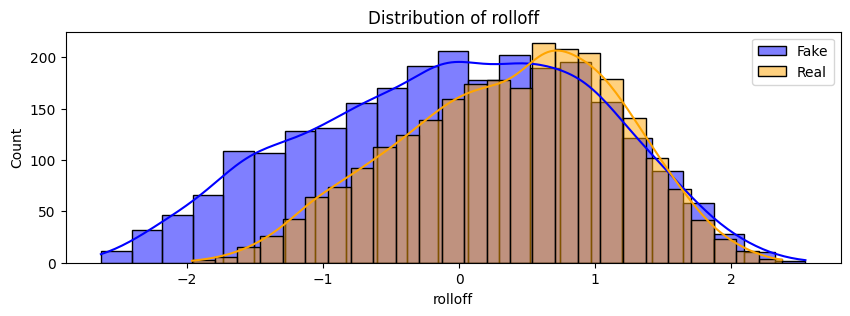

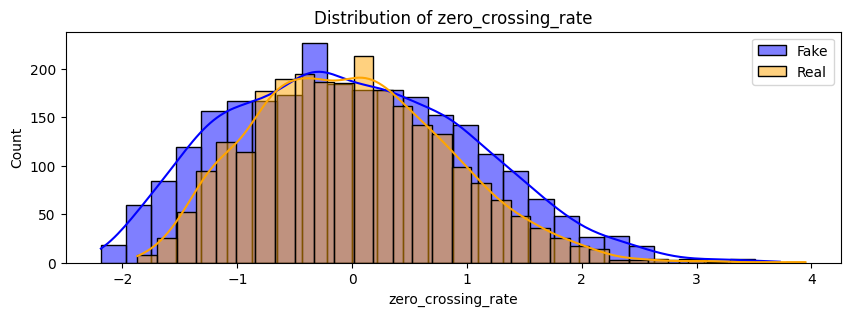

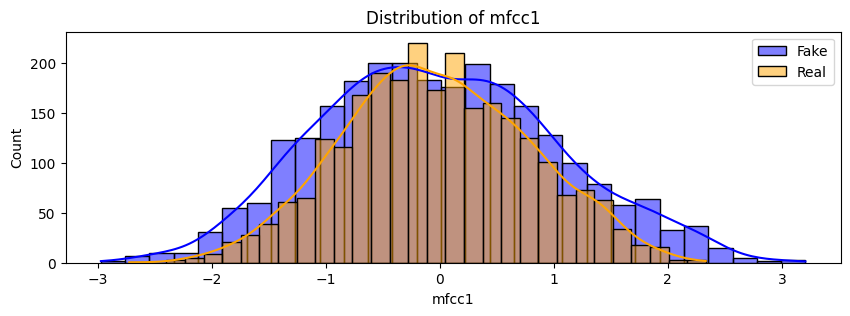

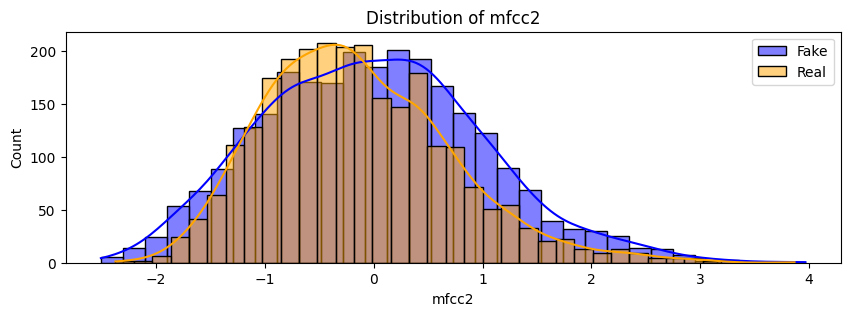

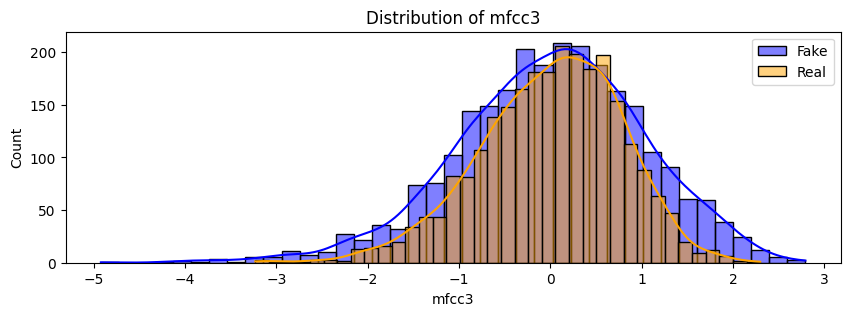

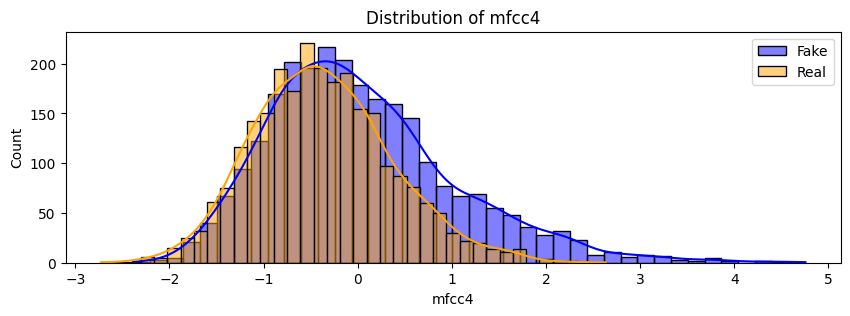

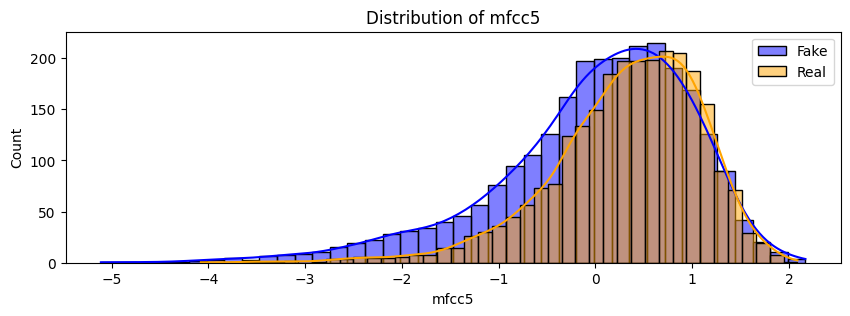

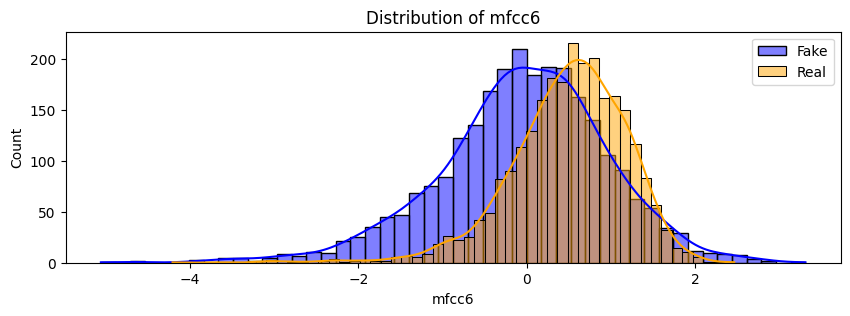

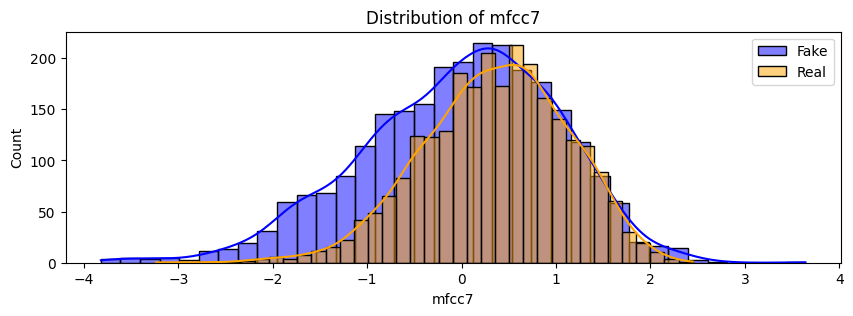

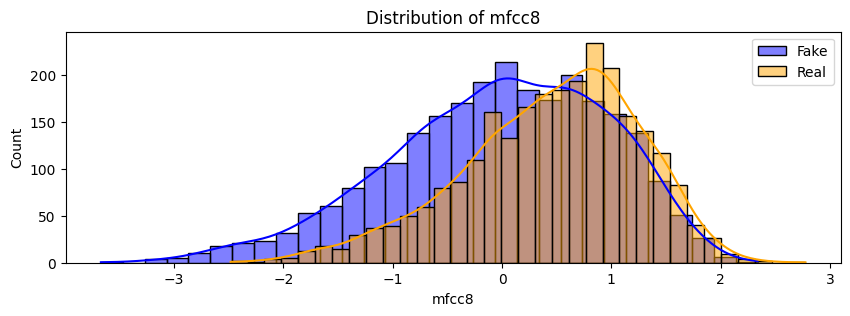

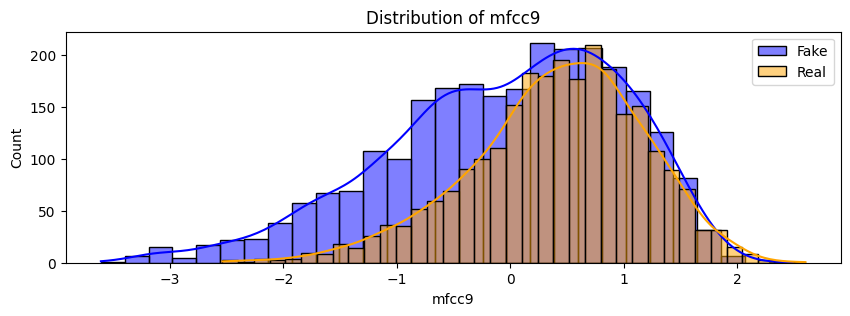

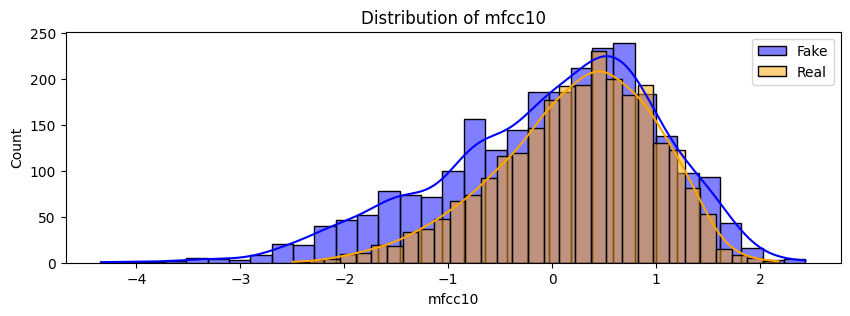

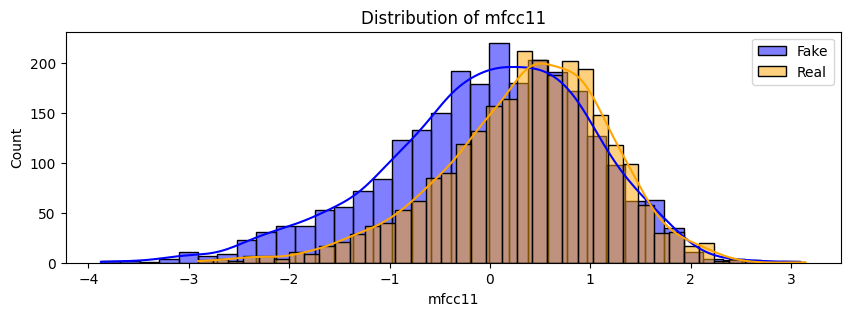

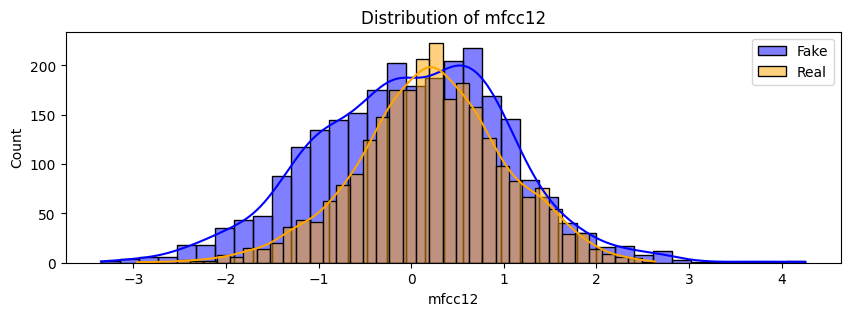

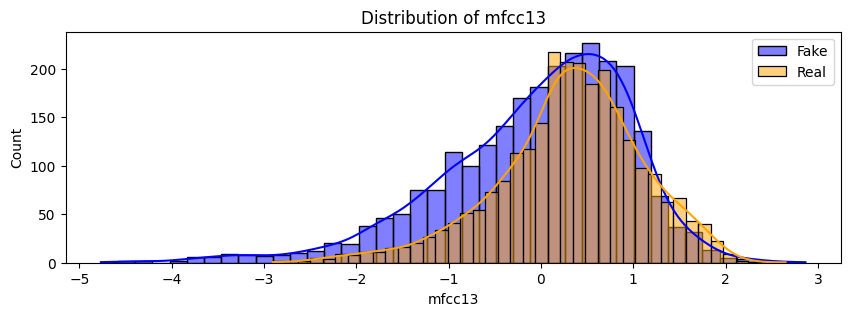

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

for column in X:
    plt.figure(figsize=(10, 3))
    sns.histplot(fake_df_downsampled[column], kde=True, label='Fake', color='blue')
    sns.histplot(real_df_downsampled[column], kde=True, label='Real', color='orange')

    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()


In [ ]:
# warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
# for column in X:
#     plt.figure(figsize=(10, 3))
#     sns.histplot(audio_data[audio_data['LABEL'] == 0][column], kde=True, label='Fake', color='blue')
#     sns.histplot(audio_data[audio_data['LABEL'] == 1][column], kde=True, label='Real', color='orange')
#     plt.title(f'Distribution of {column}')
#     plt.legend()
#     plt.show()

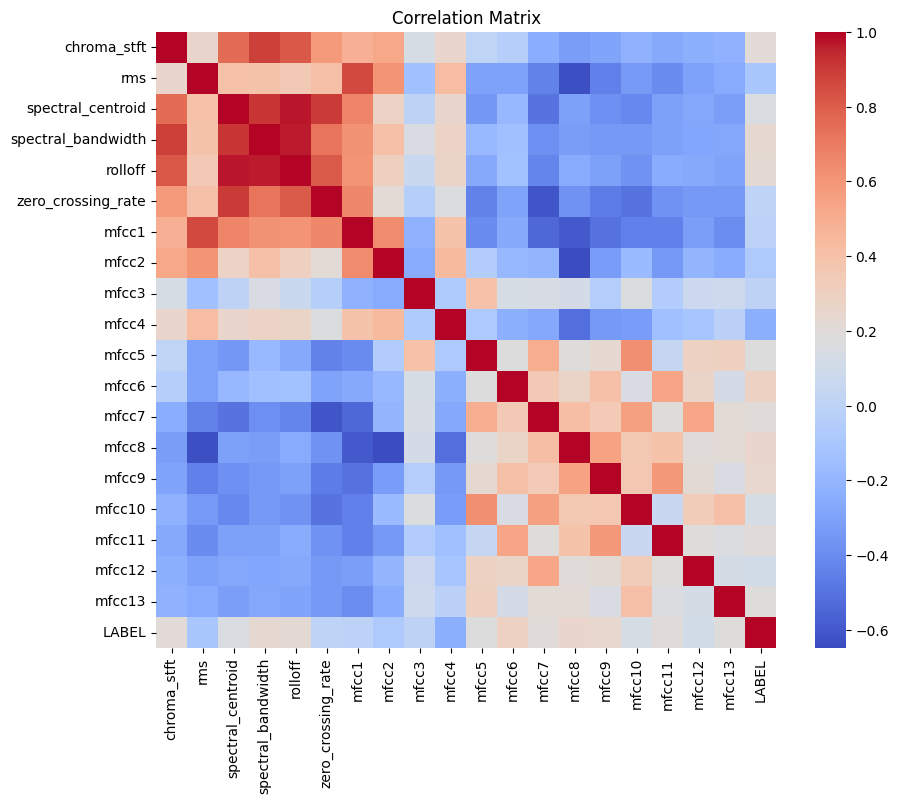

In [ ]:
import seaborn as sns

correlation_matrix = balanced_audio_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X_train

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
9233,1.016766,0.059310,0.318001,0.880825,0.692339,0.120926,0.121226,-0.209067,0.874382,0.517503,-0.600367,-0.696722,-0.965912,-0.483336,-0.707036,-1.304816,-0.457535,-0.590168,-2.059091
22651,-0.286704,1.674546,0.274128,0.047271,-0.095843,0.790107,1.318014,2.267558,-1.502915,-0.018143,-2.575805,-0.756980,-1.688640,-1.908518,-0.470279,-1.589448,-1.246691,-2.087940,0.358859
1800,0.617428,0.395093,1.263009,1.335089,1.380040,0.828522,1.307613,0.440029,-0.955909,-0.095261,-1.114349,-0.558797,0.140440,0.787649,-0.307362,-0.206240,-0.803791,0.249425,-0.606713
18623,-1.381719,-1.203735,-0.194076,-0.938477,-0.470973,-0.172644,-1.397862,-2.133059,0.330405,-0.421831,1.019032,0.875415,-0.039004,1.870872,1.144270,0.252429,1.477129,0.602500,0.684331
1468,0.562355,1.125031,0.352529,0.540458,0.430831,-0.070072,1.346098,1.499455,-1.280502,1.439074,0.803362,-1.584857,-0.250208,-1.321508,-1.371247,0.409066,-2.909701,0.426663,1.270593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,1.045337,-0.477382,-0.078691,0.668921,0.261146,-0.336427,-0.519751,0.176829,1.071381,0.558828,-0.121813,-0.560032,-0.662682,-0.316677,-1.359677,-0.596376,-1.251812,-0.832416,-0.725733
2007,1.088852,0.053348,0.570309,1.317175,0.885615,-0.098171,0.158122,-0.235861,0.418052,-0.460983,-0.205904,0.969972,1.286546,0.494332,-0.122438,-0.918364,0.231045,0.106143,0.869105
4114,0.861544,-0.583295,-0.244062,0.519467,-0.072925,0.020908,-0.508815,-0.286909,1.532086,-0.299841,0.606319,-0.238904,-0.283728,-0.624217,-1.457899,-1.088983,-0.289459,-0.473466,0.355424
21503,-1.109796,0.280981,0.118265,-0.283593,0.032485,-0.194849,-0.169026,-1.496053,-0.031082,0.169002,-0.043274,0.407635,0.811138,1.138671,0.036540,-0.071355,0.102525,0.505137,-0.079315


In [ ]:
# print(f"X_train shape: {X_train.shape}")
# print(f"X_reshaped shape: {X_reshaped.shape}")

In [ ]:
import numpy as np

# Ensure X_train is a NumPy array
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()

# Ensure y_train is a NumPy array
if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
    y_train = y_train.to_numpy()

# Get number of samples and features
num_samples, num_features = X_train.shape  # (4128, 19)

if num_features < 10:
    raise ValueError(f"X_train has only {num_features} features, but at least 10 are required.")

# Define timesteps: We take overlapping windows of 10 features
num_timesteps = num_features - 9  # 19 - 9 = 10 timesteps
X_reshaped = np.zeros((num_samples, num_timesteps, 10))

# Reshape X_train into 3D format (samples, timesteps, 10)
for i in range(num_timesteps):
    X_reshaped[:, i, :] = X_train[:, i:i + 10]

# Reshape y_train to (samples, 1)
y_train = y_train.reshape(-1, 1)

# Update X_train
X_train = X_reshaped

# Print final shapes
print(f"X_train shape: {X_train.shape}")  # Expected: (4128, 10, 10)
print(f"y_train shape: {y_train.shape}")  # Expected: (4128, 1)

X_train shape: (4128, 10, 10)
y_train shape: (4128, 1)


In [ ]:
import numpy as np
import pandas as pd

def preprocess_data(X, y):
    # Ensure X is a NumPy array
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Ensure y is a NumPy array
    if isinstance(y, pd.Series) or isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    # Get shape details
    num_samples = X.shape[0]
    num_features = X.shape[1]

    # Ensure we have at least 10 features
    if num_features < 10:
        raise ValueError(f"X has only {num_features} features, but at least 10 are required.")

    # Determine number of timesteps
    num_timesteps = min(17, num_features - 9)

    # Initialize 3D array
    X_reshaped = np.zeros((num_samples, num_timesteps, 10))

    # Reshape X into 3D format
    for i in range(num_timesteps):
        X_reshaped[:, i, :] = X[:, i:i + 10]

    # Reshape y
    y_reshaped = np.reshape(y, (y.shape[0], 1))

    return X_reshaped, y_reshaped

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

### Model 1: **BiLSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau

model1 = Sequential()

# Bidirectional LSTM
model1.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(64, return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(32)))
model1.add(LayerNormalization())

# Fully Connected Layers
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.4))

# Output Layer
model1.add(Dense(1, activation='sigmoid'))

# Optimizer
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.00003)

# Compile Model
model1.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Summary
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 10, 256)        │       142,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 10, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,657 (1.34 MB)

 Trainable params: 350,657 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=50)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4843 - loss: 0.8001
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5148 - loss: 0.7188
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5312 - loss: 0.6961
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5336 - loss: 0.6969
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5612 - loss: 0.6750
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5871 - loss: 0.6656
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6005 - loss: 0.6510
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6110 - loss: 0.6449
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6314 - loss: 0.6441
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6430 - loss: 0.6311
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6282 - loss: 0.6294
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy

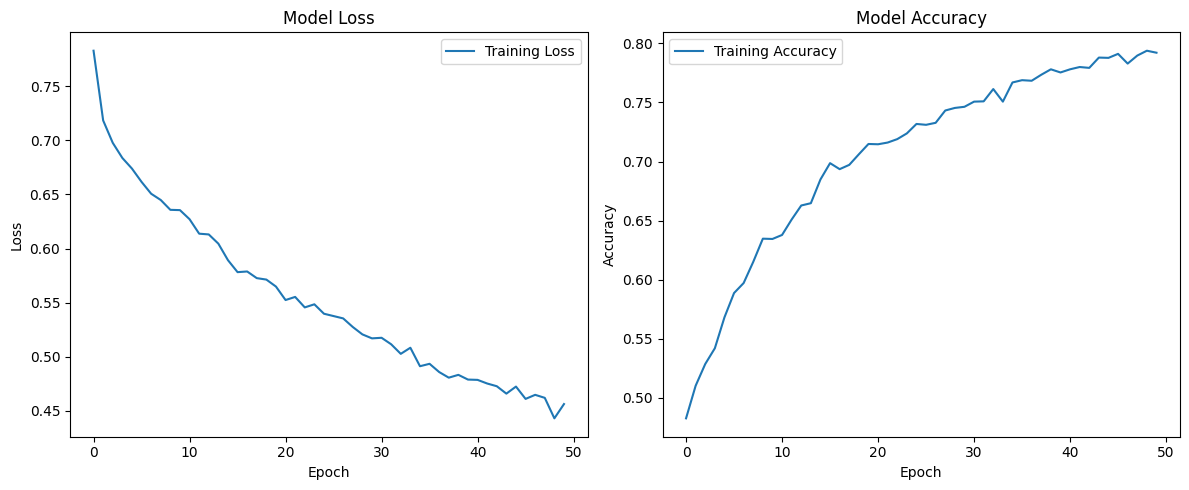

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()

In [ ]:
# Ensure X_test is a NumPy array
X_test_np = X_test.to_numpy()

# Reshape X_test into 3D format (samples, timesteps, features)
X_test_reshaped = np.zeros((X_test_np.shape[0], num_timesteps, 10))

# Reshape X_test to match X_train shape
for i in range(num_timesteps):
    X_test_reshaped[:, i, :] = X_test_np[:, i:i + 10]

# Evaluate the model
test_loss, test_acc = model1.evaluate(X_test_reshaped, y_test)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8407 - loss: 0.3725
Test Loss: 0.3705916106700897
Test Accuracy: 0.8352712988853455


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


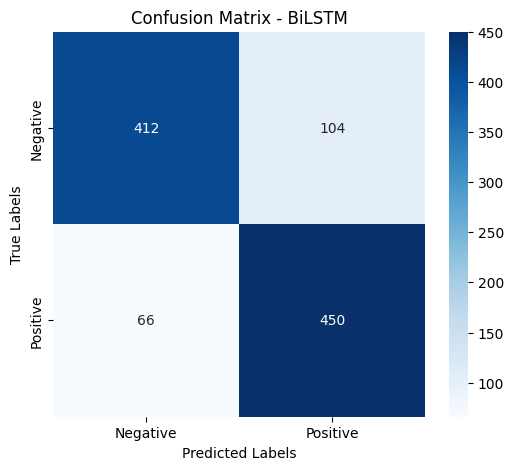

1032


In [ ]:
y_pred1 = (model1.predict(X_test_reshaped) > 0.5).astype(int)
plot_confusion_matrix(y_test, y_pred1, "BiLSTM")
print(len(X_test))

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# model1 = load_model('model1.keras')

# # Print the model summary to confirm successful loading
# model1.summary()

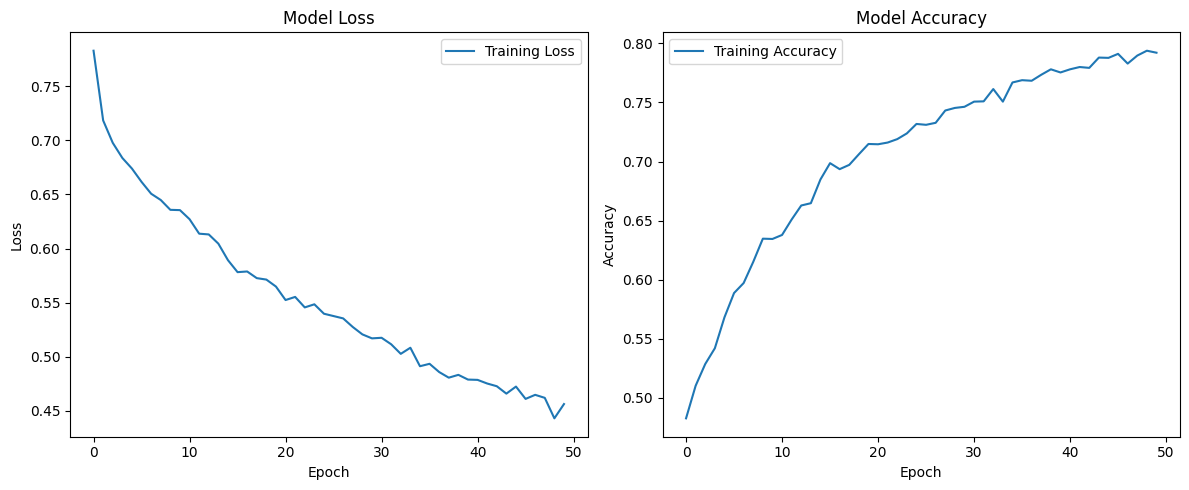

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Evaluate the model on test data
loss, accuracy1 = model1.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"Test Accuracy: {accuracy1:.4f}")

# Get model predictions (probabilities)
y_pred_probs = model1.predict(X_test_reshaped)

# Directly use predicted probabilities (avoid threshold)
y_pred = np.round(y_pred_probs)  # Instead of (y_pred_probs >= 0.5)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8407 - loss: 0.3725
Test Accuracy: 0.8353
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       516
           1       0.81      0.87      0.84       516

    accuracy                           0.84      1032
   macro avg       0.84      0.84      0.84      1032
weighted avg       0.84      0.84      0.84      1032

Precision: 0.8123
Recall: 0.8721


### Model 2: **WIREnet**

In [ ]:
X_train,X_Test,Y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=42)
X_train.shape[1]
print(Y_train.value_counts(), y_test.value_counts())

LABEL
0    2064
1    2064
Name: count, dtype: int64 LABEL
1    516
0    516
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_Test)
X_train_std = X_train_std.reshape((X_train_std.shape[0], X_train_std.shape[1], 1))
X_test_std = X_test_std.reshape((X_test_std.shape[0], X_test_std.shape[1], 1))

In [ ]:
def WIRENetSpoofImprovedEnhanced(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 3, activation="relu", padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(256, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.5)(x)
    x = Conv1D(512, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    x = Conv1D(64, 3, activation="relu", padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(256, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.5)(x)
    x = Conv1D(512, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model
input_shape = (X_train_std.shape[1], 1)
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 10 == 0:
        return lr * 0.1
    return lr
model2 = WIRENetSpoofImprovedEnhanced(input_shape)
model2.compile(
    optimizer = tf.keras.optimizers.AdamW(learning_rate=0.00003),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history2 = model2.fit(
    X_train_std,
    Y_train,
    epochs=50,
    batch_size=128,
)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5452 - loss: 4.2260
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6108 - loss: 4.0759
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6484 - loss: 3.9759
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6732 - loss: 3.8811
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6905 - loss: 3.8010
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7210 - loss: 3.7192
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7278 - loss: 3.6408
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7410 - loss: 3.5988
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7557 - loss: 3.5225
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7821 - loss: 3.4277
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7703 - loss: 3.4021
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy:

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# model2 = load_model('model2.keras')

# # Print the model summary to confirm successful loading
# model2.summary()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Evaluate the model on test data
loss, accuracy2 = model2.evaluate(X_test_std, y_test, verbose=1)
print(f"Test Accuracy: {accuracy2:.4f}")

# Get model predictions (probabilities)
y_pred_probs = model2.predict(X_test_std)

# Use np.round() instead of a manual threshold
y_pred = np.round(y_pred_probs)  # Automatically rounds (0.49 → 0, 0.51 → 1)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9213 - loss: 1.6913
Test Accuracy: 0.9264
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       516
           1       0.90      0.96      0.93       516

    accuracy                           0.93      1032
   macro avg       0.93      0.93      0.93      1032
weighted avg       0.93      0.93      0.93      1032

Precision: 0.8986
Recall: 0.9612


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


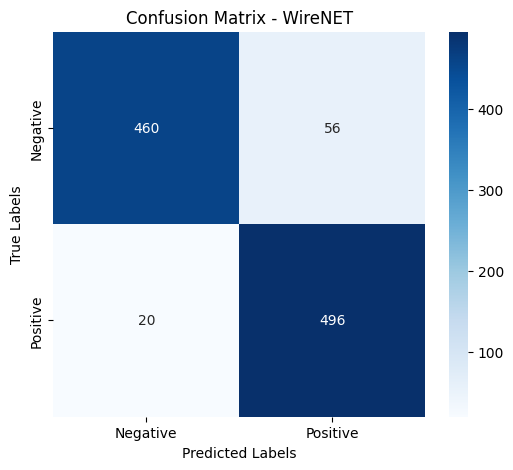

1032


In [ ]:
y_pred2 = (model2.predict(X_test_std) > 0.5).astype(int)
plot_confusion_matrix(y_test, y_pred2, "WireNET")
print(len(X_test_std))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


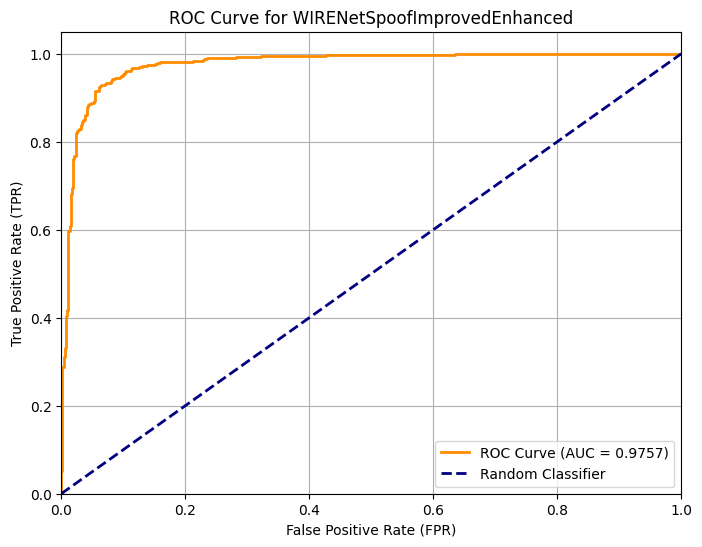

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities on test data
y_test_prob = model2.predict(X_test_std)

# Convert y_test to NumPy array if it's a Series
y_test_flat = y_test.to_numpy()  # Safe conversion

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_flat, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for WIRENetSpoofImprovedEnhanced')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

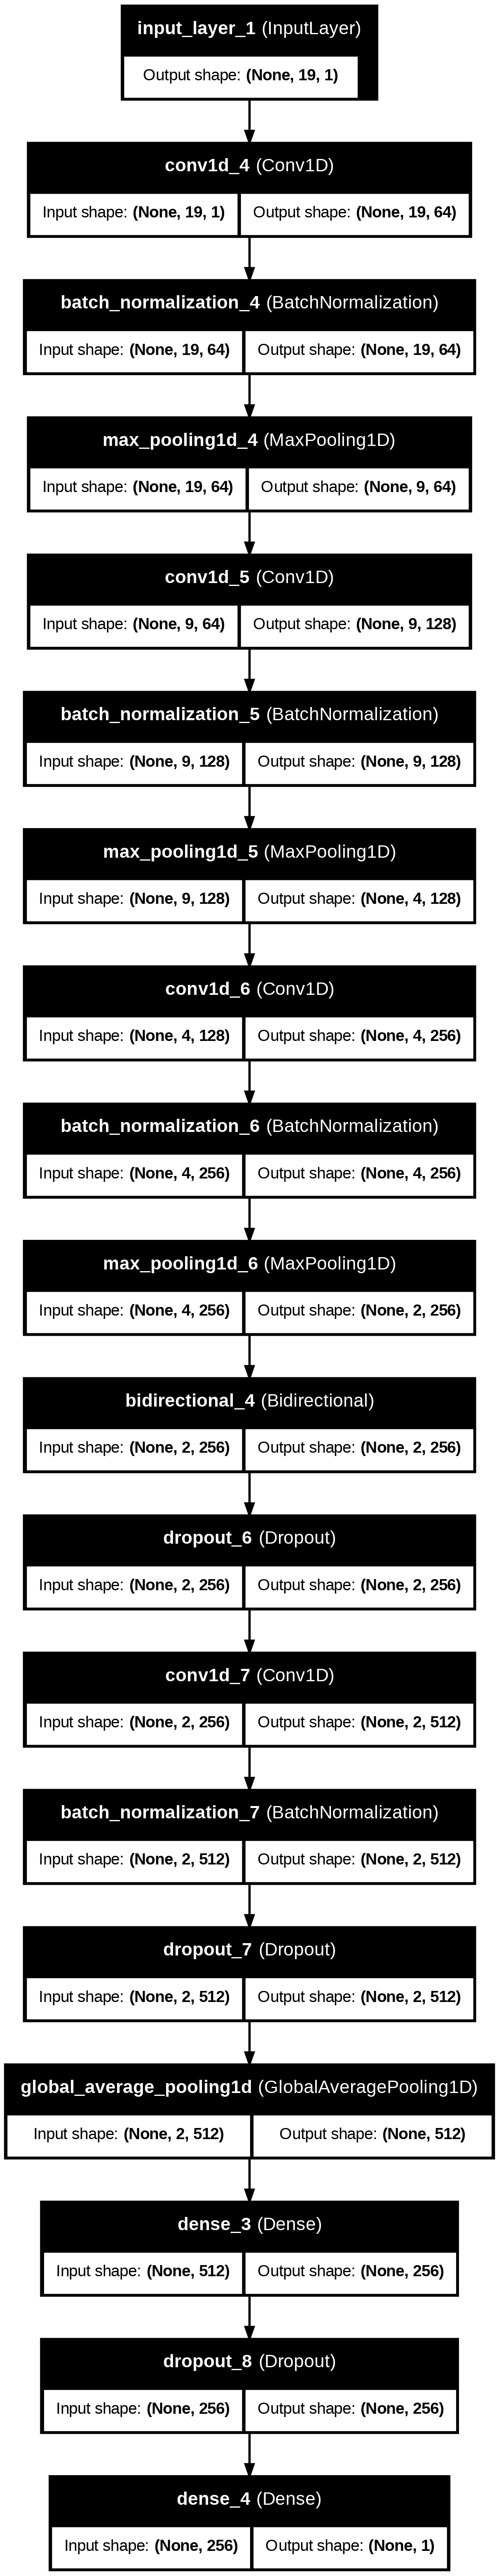

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='wirenet_architecture.png', show_shapes=True, show_layer_names=True)

### Model 3: **Random** **Forest** **Classifier**

In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=42)
X_train.shape[1]
print(Y_train.value_counts(), y_test.value_counts())

LABEL
0    2064
1    2064
Name: count, dtype: int64 LABEL
1    516
0    516
Name: count, dtype: int64


In [ ]:
rf = RandomForestClassifier(
    n_estimators=72,
    max_depth=10,
    min_samples_split=11,
    min_samples_leaf=7,
    max_features='sqrt',
    random_state=42
)

history3 = rf.fit(X_train, y_train)


train_accuracy = rf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9411


In [ ]:
y_pred = rf.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print(accuracy3)

0.8875968992248062


In [ ]:
y_pred_new = rf.predict(X_test)

# Compute accuracy
accuracy3 = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))

print(f"Test Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       516
           1       0.86      0.92      0.89       516

    accuracy                           0.89      1032
   macro avg       0.89      0.89      0.89      1032
weighted avg       0.89      0.89      0.89      1032

Test Accuracy: 0.8876
Precision: 0.8650
Recall: 0.9186


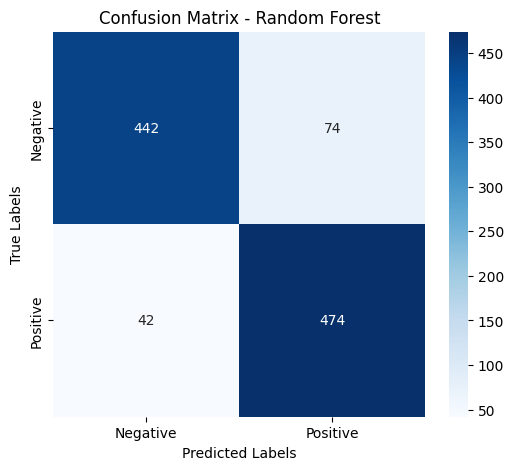

In [ ]:
# Get predictions for Random Forest
y_pred3 = rf.predict(X_test)  # No need for np.argmax()

# Ensure y_test is in the correct format (convert from one-hot if needed)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, y_pred3, "Random Forest")

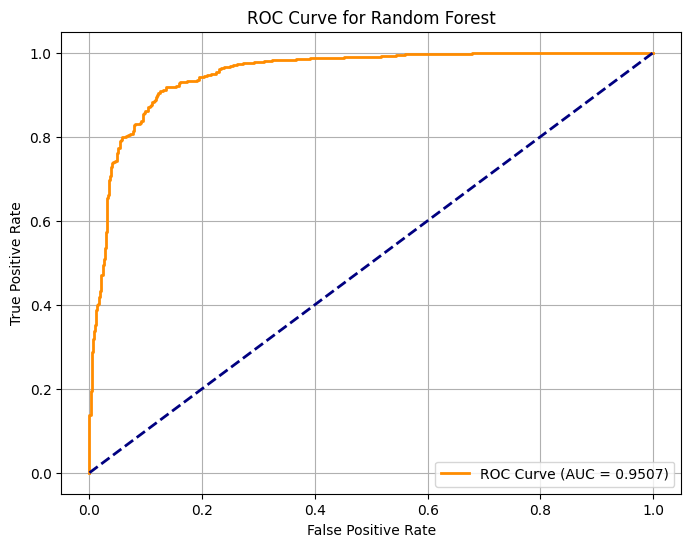

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 2. Predict probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:, 1]  # Take only the probability of class 1

# 3. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import pickle
import json

# Save Random Forest history (history3)
rf_metrics = {
    "train_accuracy": history3.score(X_train, y_train),
    "test_accuracy": history3.score(X_test, y_test)
}
with open("history3_rf13.json", "w") as f:
    json.dump(rf_metrics, f)
print("History3 saved successfully!")

History3 saved successfully!


### Model 4: **SVM** (Support Vector Machine)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(X_train),len(X_test))
print(X_train[0])

4128 1032
[ 0.97640468  0.17235599  0.21673328  0.77356021  0.56900472  0.12924357
  0.14491336 -0.14368016  0.95649517  0.75782745 -0.80782532 -1.00775701
 -1.23434646 -0.72736193 -0.93488746 -1.52286586 -0.64759539 -0.76533726
 -2.32015559]


In [ ]:
svm_classifier = SVC(kernel='rbf', probability=True, C=3.5,random_state=42)
history4 = svm_classifier.fit(X_train, y_train)

In [ ]:
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9695


In [ ]:
y_pred = svm_classifier.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)
print(accuracy4)

0.9486434108527132


In [ ]:
y_pred_new = svm_classifier.predict(X_test)

# Compute accuracy, precision, and recall
accuracy4 = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))

print(f"Test Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       516
           1       0.94      0.96      0.95       516

    accuracy                           0.95      1032
   macro avg       0.95      0.95      0.95      1032
weighted avg       0.95      0.95      0.95      1032

Test Accuracy: 0.9486
Precision: 0.9360
Recall: 0.9632


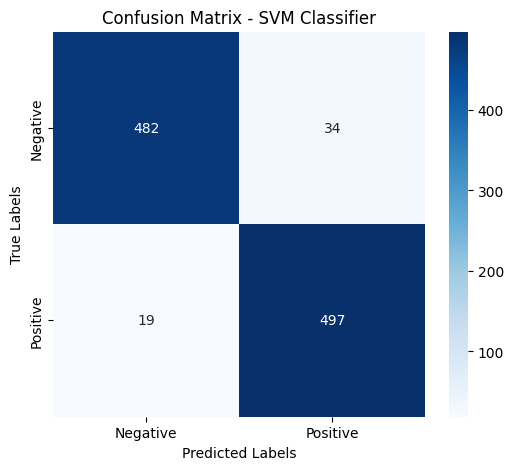

In [ ]:
# Get predictions for SVM Classifier
y_pred_svm = svm_classifier.predict(X_test)  # No need for np.argmax()

# Ensure y_test is in the correct format (convert from one-hot if needed)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Plot Confusion Matrix for SVM Classifier
plot_confusion_matrix(y_test, y_pred_svm, "SVM Classifier")

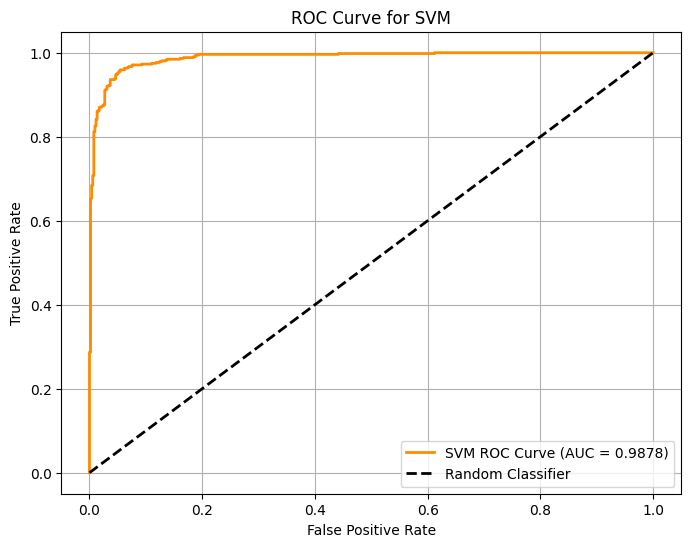

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Step 3: Predict probabilities
y_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Step 4: ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 5: Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import pickle
import json

# Save SVM history (history4)
svm_metrics = {
    "train_accuracy": history4.score(X_train, y_train),
    "test_accuracy": history4.score(X_test, y_test)
}
with open("history4_svm13.json", "w") as f:
    json.dump(svm_metrics, f)

print("History4 saved successfully!")


History4 saved successfully!


### Model 5: **ResNet** **FC**

In [ ]:
n_samples = min(len(real_df), len(fake_df))

real_df_downsampled = real_df.sample(n=n_samples, random_state=42)
fake_df_downsampled = fake_df.sample(n=n_samples, random_state=42)

balanced_audio_data = pd.concat([real_df_downsampled, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=42)
print(len(X_test),len(X_train))

1032 4128


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def res_block(x, units):
    """Residual block for fully connected layers."""
    res = layers.Dense(units, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Dense(units)(res)
    res = layers.BatchNormalization()(res)
    x = layers.Add()([x, res])
    return layers.ReLU()(x)

def ResNetFC(input_shape, num_classes=1):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = res_block(x, 128)
    x = res_block(x, 128)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    return model

input_shape = (X_train.shape[1],)  # Ensure input shape matches feature count
model5 = ResNetFC(input_shape)

# Compile model
model5.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history5 = model5.fit(X_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.5306 - loss: 0.8451
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6060 - loss: 0.7121
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6836 - loss: 0.6113
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7096 - loss: 0.5734
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7472 - loss: 0.5190
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7653 - loss: 0.4896
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7856 - loss: 0.4660
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8032 - loss: 0.4387
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8175 - loss: 0.4271
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 0.4021
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8368 - loss: 0.3894
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - 

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# model5 = load_model('model5.keras')

# # Print the model summary to confirm successful loading
# model5.summary()

In [ ]:
# Evaluate model
accuracy5 = model5.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy5[1] * 100:.2f}%')

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9041 - loss: 0.2156
Test Accuracy: 90.89%


In [ ]:
print(len(X_test),len(X_train),len(y_test))

1032 4128 1032


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


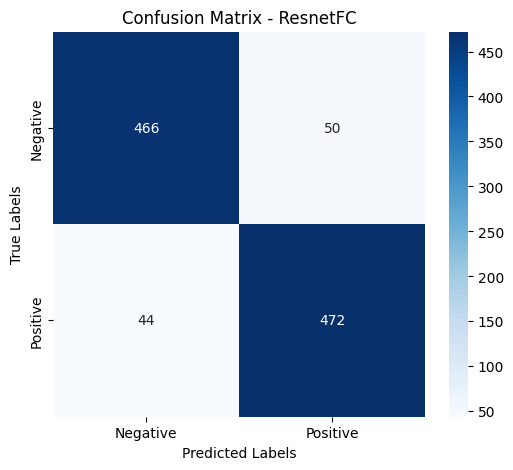

1032


In [ ]:
y_pred5 = (model5.predict(X_test) > 0.5).astype(int)
plot_confusion_matrix(y_test, y_pred5, "ResnetFC")
print(len(X_test))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


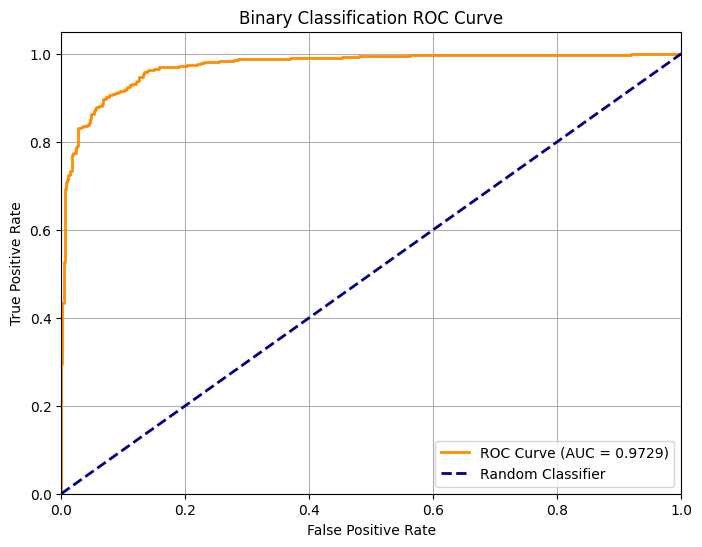

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = model5.predict(X_test).ravel()  # shape: (n_samples,)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary Classification ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Predict using trained ResNetFC model
y_pred_probs = model5.predict(X_test)  # Probabilities from sigmoid layer
y_pred_new = (y_pred_probs > 0.5).astype(int)  # Convert to binary labels

# Compute accuracy, precision, and recall
accuracy5 = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))

print(f"Test Accuracy: {accuracy5:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       516
           1       0.90      0.91      0.91       516

    accuracy                           0.91      1032
   macro avg       0.91      0.91      0.91      1032
weighted avg       0.91      0.91      0.91      1032

Test Accuracy: 0.9089
Precision: 0.9042
Recall: 0.9147


### Model 6: **SE**-**Enhanced** **1D**-**CNN** **for** **Time** **Series** **Classification**

In [ ]:
n_samples = min(len(real_df), len(fake_df))

real_df_downsampled = real_df.sample(n=n_samples, random_state=42)
fake_df_downsampled = fake_df.sample(n=n_samples, random_state=42)

balanced_audio_data = pd.concat([real_df_downsampled, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=42)
print(len(X_test),len(X_train))

1032 4128


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Flatten,
                                     Dense, Add, GlobalAveragePooling2D, Reshape, Dropout, Multiply)
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE  # New: Synthetic Oversampling
from tensorflow.keras.optimizers.schedules import CosineDecay  # New: Better LR Scheduler

# Load and encode primary dataset
df = pd.read_csv(data_file)
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

real_df = df[df['LABEL'] == 1]
fake_df = df[df['LABEL'] == 0]

n_samples = min(len(real_df), len(fake_df))

real_df_downsampled = real_df.sample(n=n_samples, random_state=42)
fake_df_downsampled = fake_df.sample(n=n_samples, random_state=42)

balanced_audio_data = pd.concat([real_df_downsampled, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=42)
# # Select features & labels
# feature_columns = df.columns[:-1]
# X = df[feature_columns].values
# y = df["LABEL"].values

# # Apply SMOTE for better class balance
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape for CNN input (Batch, Time, Features)
X_train_reshaped = np.expand_dims(X_train, axis=1)
X_test_reshaped = np.expand_dims(X_test, axis=1)

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [ ]:
X_test_reshaped.shape

(1032, 1, 19)

In [ ]:
# Define custom Focal Loss to handle class imbalance
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        epsilon = 1e-6
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -alpha * (1 - pt) ** gamma * tf.math.log(pt)
        return tf.reduce_sum(loss, axis=-1)
    return loss

# Define Cosine Learning Rate Scheduler
# initial_learning_rate = 0.005
# lr_schedule = CosineDecay(initial_learning_rate, decay_steps=1000, alpha=0.0001)

# Number of features
num_features = X_train_reshaped.shape[-1]

# Define Model Architecture with Residual Connections
input_layer = Input(shape=(1, num_features, 1))  # (Time, Features, Channel)

# Conv Block 1
x = Conv2D(64, (1, 3), padding="same", kernel_regularizer=l2(0.001))(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D(pool_size=(1, 2))(x)
x = Dropout(0.3)(x)

# Residual Block 1
res = Conv2D(64, (1, 3), padding="same", kernel_regularizer=l2(0.001))(x)
res = BatchNormalization()(res)
res = LeakyReLU()(res)
res = Conv2D(64, (1, 3), padding="same", kernel_regularizer=l2(0.001))(res)
res = BatchNormalization()(res)
x = Add()([x, res])  # Residual Connection
x = LeakyReLU()(x)

# Conv Block 2
x = Conv2D(128, (1, 3), padding="same", kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D(pool_size=(1, 2))(x)
x = Dropout(0.3)(x)

# Squeeze-and-Excitation (SE) Attention
se = GlobalAveragePooling2D()(x)
se = Dense(64, activation="relu")(se)
se = Dense(128, activation="sigmoid")(se)
se = Reshape((1, 1, 128))(se)
x = Multiply()([x, se])

# Fully Connected Layers
x = Flatten()(x)
x = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(64, activation="relu", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)

# Output Layer
output_layer = Dense(y_train_categorical.shape[1], activation="softmax")(x)

# Build Model
model6 = Model(inputs=input_layer, outputs=output_layer)

# Compile Model with Focal Loss
model6.compile(loss=focal_loss(), optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003), metrics=["accuracy"])
model6.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 1, 19, 1)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 1, 19, 64) │        256 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 19, 64) │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 1, 19, 64) │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 1, 9, 64)  │          0 │ leaky_re_lu[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 1, 9, 64)  │          0 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 1, 9, 64)  │     12,352 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 9, 64)  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 1, 9, 64)  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 1, 9, 64)  │     12,352 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 9, 64)  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 1, 9, 64)  │          0 │ dropout_9[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 1, 9, 64)  │          0 │ add_2[0][0]       │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 1, 9, 128) │     24,704 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 9, 128) │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 1, 9, 128) │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 1, 4, 128) │          0 │ leaky_re_lu_3[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 1, 4, 128) │          0 │ max_pooling2d_1[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 141,570 (553.01 KB)

 Trainable params: 140,930 (550.51 KB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-5)

# Train Model
history6 = model6.fit(
    X_train_reshaped, y_train_categorical,
    epochs=50,
    batch_size=64,
)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.5373 - loss: 0.6875
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5602 - loss: 0.6388
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5715 - loss: 0.6310
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5816 - loss: 0.6231
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5879 - loss: 0.6066
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6083 - loss: 0.6015
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6222 - loss: 0.5895
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6103 - loss: 0.5855
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6179 - loss: 0.5822
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6399 - loss: 0.5751
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6523 - loss: 0.5692
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6243 - 

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.layers import Dense, Multiply
# from tensorflow.keras.optimizers.schedules import CosineDecay

# # Define Custom Focal Loss
# def focal_loss(alpha=0.25, gamma=2.0):
#     def loss(y_true, y_pred):
#         epsilon = 1e-6
#         y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
#         pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
#         loss = -alpha * (1 - pt) ** gamma * tf.math.log(pt)
#         return tf.reduce_sum(loss, axis=-1)  # Match the function definition used in training
#     return loss

# # Load the saved model
# model6 = tf.keras.models.load_model("model6.keras", custom_objects={"loss": focal_loss()})

# # Verify model architecture
# model6.summary()

In [ ]:
# Generate classification reports
y_test_pred = np.argmax(model6.predict(X_test_reshaped), axis=1)
accuracy6 = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy6:.4f}")
unique_labels = np.unique(np.concatenate((y_test, y_test_pred)))
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred, labels=unique_labels))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Test Accuracy: 0.8246
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       516
           1       0.76      0.94      0.84       516

    accuracy                           0.82      1032
   macro avg       0.84      0.82      0.82      1032
weighted avg       0.84      0.82      0.82      1032



33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


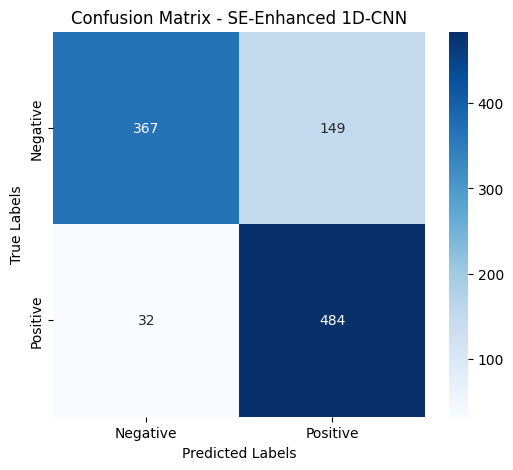

In [ ]:
# Model 6 SE-Enhanced 1D-CNN for Time Series Classification
y_pred6 = np.argmax(model6.predict(X_test_reshaped), axis=1)
plot_confusion_matrix(y_test, y_pred6, "SE-Enhanced 1D-CNN")

In [ ]:
audio_data = pd.read_csv(data_file)

label_encoder = LabelEncoder()
audio_data['LABEL'] = label_encoder.fit_transform(audio_data['LABEL'])

y = audio_data['LABEL']
X = audio_data.drop('LABEL', axis = 1)

real_df = audio_data[audio_data['LABEL'] == 1]
fake_df = audio_data[audio_data['LABEL'] == 0]

fake_df_downsampled = fake_df.sample(n=len(real_df), random_state=42)

balanced_audio_data = pd.concat([real_df, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(y_train.value_counts(), y_test.value_counts())

LABEL
1    2083
0    2045
Name: count, dtype: int64 LABEL
0    535
1    497
Name: count, dtype: int64


In [ ]:
print("X_train shape:", X_train.shape)  # (samples, 1, 26, 10)
print("y_train shape:", y_train.shape)  # (samples,)

X_train shape: (4128, 19)
y_train shape: (4128,)


In [ ]:
import numpy as np

# Pad X_train with zeros to make it (4128, 26)
X_train_padded = np.pad(X_train, ((0, 0), (0, 7)), mode='constant')
X_test_padded = np.pad(X_test, ((0, 0), (0, 7)), mode='constant')

# Reshape to (samples, 13, 2, 1)
X_train = X_train_padded.reshape((X_train.shape[0], 13, 2, 1))
X_test = X_test_padded.reshape((X_test.shape[0], 13, 2, 1))

print("X_train_reshaped shape:", X_train_reshaped.shape)  # Expected: (4128, 13, 2, 1)
print("X_test_reshaped shape:", X_test_reshaped.shape)  # Expected: (samples, 13, 2, 1)

X_train_reshaped shape: (4128, 1, 19)
X_test_reshaped shape: (1032, 1, 19)


In [ ]:
# import numpy as np
# from tensorflow.keras.utils import to_categorical

# # Convert pandas DataFrame to NumPy array
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
# # y_train = y_train.to_numpy()
# # y_test = y_test.to_numpy()

# # Ensure labels are one-hot encoded
# NUM_CLASSES = len(np.unique(y_train))  # Get the number of unique classes
# y_train = to_categorical(y_train, NUM_CLASSES)
# y_test = to_categorical(y_test, NUM_CLASSES)

# # Reshape X_train for CNN input
# # Assuming you want a 2D (image-like) representation, reshape to (15,3,1)
# X_train = X_train.reshape((X_train.shape[0], 15, 3, 1))
# X_test = X_test.reshape((X_test.shape[0], 15, 3, 1))

# # Define the CNN input shape
# input_shape = (15, 3, 1)

# print("X_train shape:", X_train.shape)  # Should be (num_samples, 13, 2, 1)
# print("y_train shape:", y_train.shape)  # Should be (num_samples, NUM_CLASSES)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# # Convert pandas DataFrame to NumPy array
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Ensure labels are one-hot encoded
NUM_CLASSES = len(np.unique(y_train))  # Get the number of unique classes
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Reshape X_train for CNN input
# Assuming you want a 2D (image-like) representation, reshape to (13,2,1)
X_train = X_train.reshape((X_train.shape[0], 13, 2, 1))
X_test = X_test.reshape((X_test.shape[0], 13, 2, 1))

# Define the CNN input shape
input_shape = (13, 2, 1)

print("X_train shape:", X_train.shape)  # Should be (num_samples, 13, 2, 1)
print("y_train shape:", y_train.shape)  # Should be (num_samples, NUM_CLASSES)

X_train shape: (4128, 13, 2, 1)
y_train shape: (4128, 2)


### Model 7: **Custom** **CNN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.utils import to_categorical

# Define input shape
input_shape = (13, 2, 1)  # (Height=13, Width=2, Channels=1)

# Input layer
model_input = Input(shape=input_shape)

# First Conv layer with L2 regularization
x = Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same', kernel_regularizer=l2(0.004))(model_input)
x = MaxPooling2D(pool_size=(2, 1), padding='same')(x)  # Pool over height only

# Second Conv layer with L2 regularization
x = Conv2D(64, kernel_size=(2, 1), activation='relu', padding='same', kernel_regularizer=l2(0.004))(x)
x = MaxPooling2D(pool_size=(2, 1), padding='same')(x)

# Flatten and Dense layers with L2 regularization
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.004))(x)
x = Dropout(0.5)(x)  # Dropout for regularization

# Output layer
model_output = Dense(NUM_CLASSES, activation='softmax')(x)

# # Define learning rate schedule
# lr_schedule = ExponentialDecay(initial_learning_rate=0.00001, decay_steps=1000, decay_rate=0.96, staircase=True)

# Define and compile model
model7 = Model(inputs=model_input, outputs=model_output)
model7.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model7.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 13, 2, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 2, 32)      │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 2, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,242 (274.38 KB)

 Trainable params: 70,242 (274.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history7 = model7.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5211 - loss: 1.6704 - val_accuracy: 0.6056 - val_loss: 1.5889
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5920 - loss: 1.5746 - val_accuracy: 0.7141 - val_loss: 1.5025
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6375 - loss: 1.4888 - val_accuracy: 0.7103 - val_loss: 1.4242
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6875 - loss: 1.4037 - val_accuracy: 0.7161 - val_loss: 1.3510
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7214 - loss: 1.3326 - val_accuracy: 0.7267 - val_loss: 1.2837
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7186 - loss: 1.2691 - val_accuracy: 0.7345 - val_loss: 1.2207
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 1.2139 - val_accuracy: 0.7364 - val_loss: 1.1637
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7397 - loss: 1.1504 - val_accuracy: 0

In [ ]:
# model7 = tf.keras.models.load_model("model713.keras")
# model7.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 13, 2, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 2, 32)      │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 2, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,728 (823.16 KB)

 Trainable params: 70,242 (274.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 140,486 (548.78 KB)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Predict class probabilities
y_pred_probs = model7.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy7 = accuracy_score(y_true, y_pred)
print(f"Model Accuracy: {accuracy7:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Model Accuracy: 0.8576
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       535
           1       0.84      0.87      0.86       497

    accuracy                           0.86      1032
   macro avg       0.86      0.86      0.86      1032
weighted avg       0.86      0.86      0.86      1032



33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


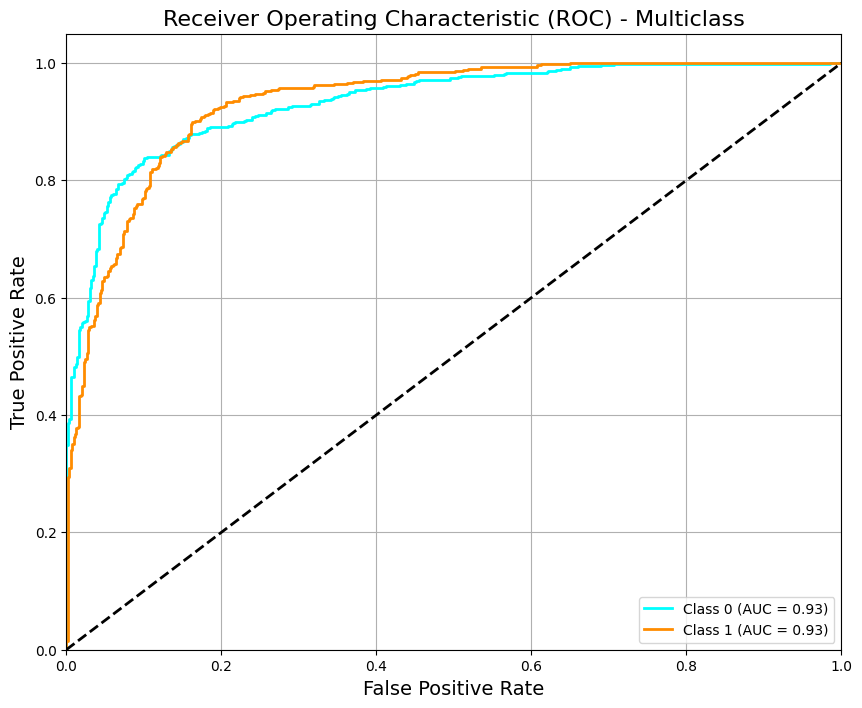

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from itertools import cycle

# Get predicted probabilities
y_score = model7.predict(X_test)

# Ensure y_test is a numpy array
y_test_flat = np.array(y_test)

# One-hot encode y_test if not already
if y_test_flat.ndim == 1:
    y_test_bin = label_binarize(y_test_flat, classes=list(range(NUM_CLASSES)))
else:
    y_test_bin = y_test_flat  # Already one-hot

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'gold', 'navy', 'teal', 'darkred'])

for i, color in zip(range(NUM_CLASSES), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) - Multiclass', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


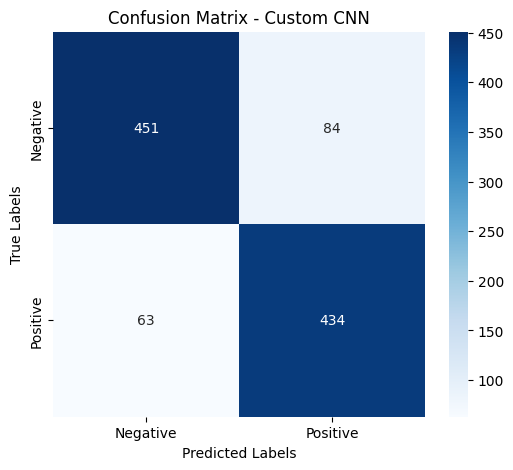

In [ ]:
# Convert one-hot encoded y_test to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # Check if y_test is one-hot
    y_test = np.argmax(y_test, axis=1)

# Get predictions for Custom CNN (Model 7)
y_pred7 = np.argmax(model7.predict(X_test), axis=1)  # Convert probabilities to class labels

# Plot Confusion Matrix for Custom CNN
plot_confusion_matrix(y_test, y_pred7, "Custom CNN")


### Model 8: **ResCNN**-**Attention**-**BiGRU**

In [ ]:
audio_data = pd.read_csv(data_file)

label_encoder = LabelEncoder()
audio_data['LABEL'] = label_encoder.fit_transform(audio_data['LABEL'])

y = audio_data['LABEL']
X = audio_data.drop('LABEL', axis = 1)

real_df = audio_data[audio_data['LABEL'] == 1]
fake_df = audio_data[audio_data['LABEL'] == 0]

fake_df_downsampled = fake_df.sample(n=len(real_df), random_state=42)

balanced_audio_data = pd.concat([real_df, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(y_train.value_counts(), y_test.value_counts())

LABEL
1    2083
0    2045
Name: count, dtype: int64 LABEL
0    535
1    497
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load Dataset
df = pd.read_csv(data_file)

# Encode Labels
label_encoder = LabelEncoder()
df["LABEL"] = label_encoder.fit_transform(df["LABEL"])

# Downsample Fake Data to Match Real Data
real_df = df[df["LABEL"] == 1]
fake_df = df[df["LABEL"] == 0]
fake_df_downsampled = fake_df.sample(n=len(real_df), random_state=42)

# Combine and Shuffle Balanced Dataset
balanced_df = pd.concat([real_df, fake_df_downsampled]).sample(frac=1, random_state=42)

# Extract Features & Labels
X = balanced_df.drop(columns=["LABEL"]).values
y = balanced_df["LABEL"].values

# Normalize Features (Zero Mean, Unit Variance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# Reshape for Conv1D (Batch, Time, Features)
X_train_reshaped = np.expand_dims(X_train, axis=-1)  # (Batch, Time_Steps, Features)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Convert Labels to One-Hot Encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print("Final Data Shapes:")
print(f"X_train: {X_train_reshaped.shape}, y_train: {y_train_categorical.shape}")
print(f"X_test: {X_test_reshaped.shape}, y_test: {y_test_categorical.shape}")


Final Data Shapes:
X_train: (4128, 19, 1), y_train: (4128, 2)
X_test: (1032, 19, 1), y_test: (1032, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, BatchNormalization, Activation, Dropout, Dense,
                                     Add, GlobalAveragePooling1D, Multiply, GRU, Bidirectional)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import CosineDecay
import numpy as np

# Define Custom Focal Loss for Imbalanced Data
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        epsilon = 1e-6
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -alpha * (1 - pt) ** gamma * tf.math.log(pt)
        return tf.reduce_mean(loss)
    return loss

# Self-Attention Mechanism (for sequence learning)
def self_attention(x):
    attn_weights = Dense(x.shape[-1], activation="softmax")(x)
    return Multiply()([x, attn_weights])

# Learning Rate Warmup + Cosine Decay
def warmup_cosine_decay(lr_start=1e-4, lr_max=0.005, warmup_epochs=5, total_epochs=50):
    def scheduler(epoch):
        if epoch < warmup_epochs:
            return lr_start + (lr_max - lr_start) * (epoch / warmup_epochs)
        else:
            return lr_max * 0.5 * (1 + np.cos(np.pi * (epoch - warmup_epochs) / (total_epochs - warmup_epochs)))
    return tf.keras.callbacks.LearningRateScheduler(scheduler)

# Input Shape
num_features = X_train_reshaped.shape[1]  # Number of Time Steps (e.g., MFCCs)
num_channels = X_train_reshaped.shape[-1]  # 1 for mono audio features

input_layer = Input(shape=(num_features, num_channels))  # (Time, Features)

# Conv Block 1 (Feature Extraction)
x = Conv1D(64, kernel_size=5, strides=1, padding="same", kernel_regularizer=l2(0.001))(input_layer)
x = BatchNormalization()(x)
x = Activation("swish")(x)
x = Dropout(0.3)(x)

# Residual Block 1
res = Conv1D(64, kernel_size=5, padding="same", kernel_regularizer=l2(0.001))(x)
res = BatchNormalization()(res)
res = Activation("swish")(res)
res = Conv1D(64, kernel_size=5, padding="same", kernel_regularizer=l2(0.001))(res)
res = BatchNormalization()(res)
x = Add()([x, res])  # Residual Connection
x = Activation("swish")(x)

# Conv Block 2 (Higher-level Features)
x = Conv1D(128, kernel_size=5, strides=2, padding="same", kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation("swish")(x)
x = Dropout(0.3)(x)

# Self-Attention for Feature Enhancement
x = self_attention(x)

# BiGRU Layer (Sequence Learning)
x = Bidirectional(GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)

# Global Feature Pooling
x = GlobalAveragePooling1D()(x)

# Fully Connected Layers
x = Dense(128, activation="swish", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(64, activation="swish", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)

# Output Layer
output_layer = Dense(y_train_categorical.shape[1], activation="softmax")(x)

# Build Model
model8 = Model(inputs=input_layer, outputs=output_layer)

# Compile Model with Focal Loss
model8.compile(loss=focal_loss(), optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003), metrics=["accuracy"])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
lr_scheduler = warmup_cosine_decay()

# Train Model
history8 = model8.fit(
    X_train_reshaped, y_train_categorical,
    validation_data=(X_test_reshaped, y_test_categorical),
    epochs=50,
    batch_size=128,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.5468 - loss: 0.4629 - val_accuracy: 0.4816 - val_loss: 0.4366 - learning_rate: 1.0000e-04
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5969 - loss: 0.3599 - val_accuracy: 0.4816 - val_loss: 0.1968 - learning_rate: 0.0011
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.6830 - loss: 0.1443 - val_accuracy: 0.4816 - val_loss: 0.0790 - learning_rate: 0.0021
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.7417 - loss: 0.0573 - val_accuracy: 0.4816 - val_loss: 0.0569 - learning_rate: 0.0030
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.7406 - loss: 0.0439 - val_accuracy: 0.4816 - val_loss: 0.0710 - learning_rate: 0.0040
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.7382 - loss: 0.0488 - val_accuracy: 0.4816 - val_loss: 0.0599 - learning_rate: 0.0050
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7372 - loss: 0.0468 -

In [ ]:
# model8 = tf.keras.models.load_model("model8.keras", custom_objects={"loss": focal_loss()})
# model8.summary()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model8.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred_labels = y_pred_probs.argmax(axis=1)
y_true_labels = y_test_categorical.argmax(axis=1)  # Convert one-hot to class labels

# Compute overall precision, recall, and F1-score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Precision: 0.9007
Recall: 0.9678
F1 Score: 0.9331


In [ ]:
# Evaluate the model on the test set
test_loss, accuracy8 = model8.evaluate(X_test_reshaped, y_test_categorical, verbose=1)

# Print accuracy
print(f"Test Accuracy: {accuracy8 * 100:.2f}%")

# Generate predictions
y_pred = model8.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test_categorical, axis=1)  # Convert one-hot labels to class labels

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9483 - loss: 0.0154
Test Accuracy: 93.31%
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       535
           1       0.90      0.97      0.93       497

    accuracy                           0.93      1032
   macro avg       0.93      0.93      0.93      1032
weighted avg       0.94      0.93      0.93      1032



33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


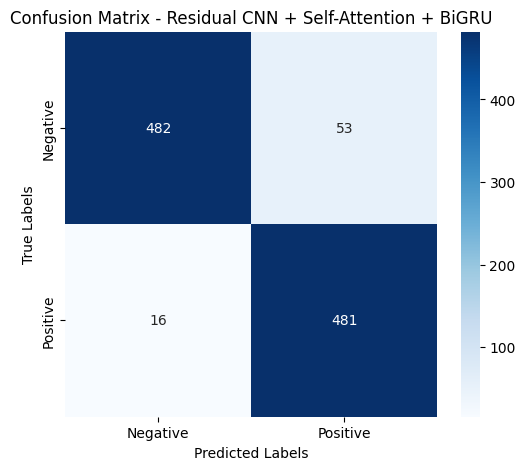

In [ ]:
# Get predictions for ResCNN-Attn-BiGRU
y_pred8 = np.argmax(model8.predict(X_test_reshaped), axis=1)  # Convert probabilities to class labels

# Plot Confusion Matrix for ResCNN-Attn-BiGRU
plot_confusion_matrix(y_test, y_pred8, "Residual CNN + Self-Attention + BiGRU")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


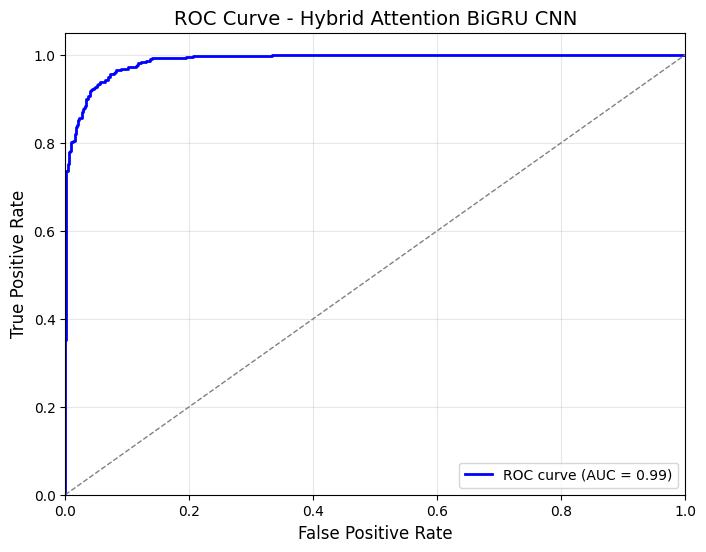

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict class probabilities (output shape: [n_samples, n_classes])
y_score = model8.predict(X_test_reshaped)

# Use the probability for the positive class (class 1)
y_score_class1 = y_score[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score_class1)  # use original y_test (not categorical)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Hybrid Attention BiGRU CNN', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import tensorflow as tf

# Dictionary of model names and objects
models = {
    "model1_13": model1,
    "model2_13": model2,
    "model5_13": model5,
    "model6_13": model6,
    "model7_13": model7
}

# Save each model using its actual name
for name, model in models.items():
    model.save(f"{name}.keras")  # Save using Keras format
    print(f"{name} saved as {name}.keras")

model1_13 saved as model1_13.keras
model2_13 saved as model2_13.keras
model5_13 saved as model5_13.keras
model6_13 saved as model6_13.keras
model7_13 saved as model7_13.keras


In [ ]:
model8.save("model8_13.keras")

In [ ]:
import joblib

# Save Random Forest model
joblib.dump(rf, 'random_forest_model_13.pkl')
print("Random Forest model saved as random_forest_model.pkl")

# Save SVM model
joblib.dump(svm_classifier, 'svm_model_13.pkl')
print("SVM model saved as svm_model.pkl")

Random Forest model saved as random_forest_model.pkl
SVM model saved as svm_model.pkl


In [ ]:
import pickle
import json

# Save Keras model histories (history1, history2, history5, history6, history7)
for i in [1, 2,5 ,6 ,7, 8]:
    with open(f"history{i}_13.json", "w") as f:
        json.dump(eval(f"history{i}.history"), f)
print("All histories 1, 2, 5, 6, 7, 8 saved successfully!")

All histories 1, 2, 5, 6, 7, 8 saved successfully!


In [ ]:
# import json

# # Function to load history from a JSON file
# def load_history(file_name):
#     with open(file_name, "r") as f:
#         history = json.load(f)
#     return history

# # Load histories
# history1 = load_history("history1.json")
# history2 = load_history("history2.json")
# history5 = load_history("history5.json")
# history6 = load_history("history6.json")
# history7 = load_history("history7.json")
# history8 = load_history("history8.json")

# # Print keys to check the loaded data
# print(history1.keys())

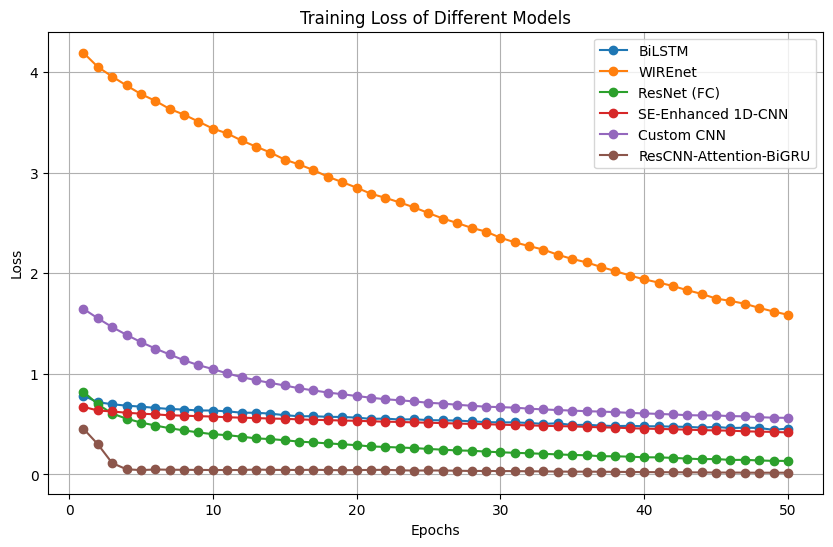

In [ ]:
# Extract loss values correctly
models_loss = {
    "BiLSTM": history1.history['loss'],
    "WIREnet": history2.history['loss'],
    "ResNet (FC)": history5.history['loss'],
    "SE-Enhanced 1D-CNN": history6.history['loss'],
    "Custom CNN": history7.history['loss'],
    "ResCNN-Attention-BiGRU": history8.history['loss']
}

epochs = range(1, len(next(iter(models_loss.values()))) + 1)  # Get number of epochs

plt.figure(figsize=(10, 6))

for model_name, loss in models_loss.items():
    plt.plot(epochs, loss, marker='o', label=model_name)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Different Models")
plt.legend()
plt.grid()
plt.show()


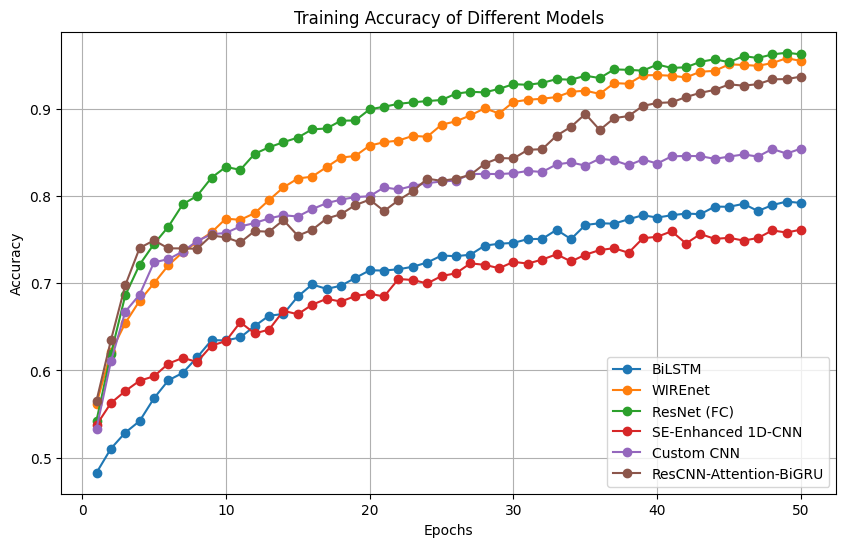

In [ ]:
# Extract accuracy values correctly
models_accuracy = {
    "BiLSTM": history1.history['accuracy'],
    "WIREnet": history2.history['accuracy'],
    "ResNet (FC)": history5.history['accuracy'],
    "SE-Enhanced 1D-CNN": history6.history['accuracy'],
    "Custom CNN": history7.history['accuracy'],
    "ResCNN-Attention-BiGRU": history8.history['accuracy']
}

epochs = range(1, len(next(iter(models_accuracy.values()))) + 1)  # Get number of epochs

plt.figure(figsize=(10, 6))

for model_name, acc in models_accuracy.items():
    plt.plot(epochs, acc, marker='o', label=model_name)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy of Different Models")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract training accuracies from history objects (Keras models)
model_names = ["BiLSTM", "WireNet", "ResnetFC", "SE-Enhanced 1D-CNN", "Custom CNN", "ResCNN-Attention-BiGRU"]
train_accuracies = [
    max(history1.history['accuracy']),
    max(history2.history['accuracy']),
    max(history5.history['accuracy']),
    max(history6.history['accuracy']),
    max(history7.history['accuracy']),
    max(history8.history['accuracy'])
]

In [ ]:
!pip install adjustText

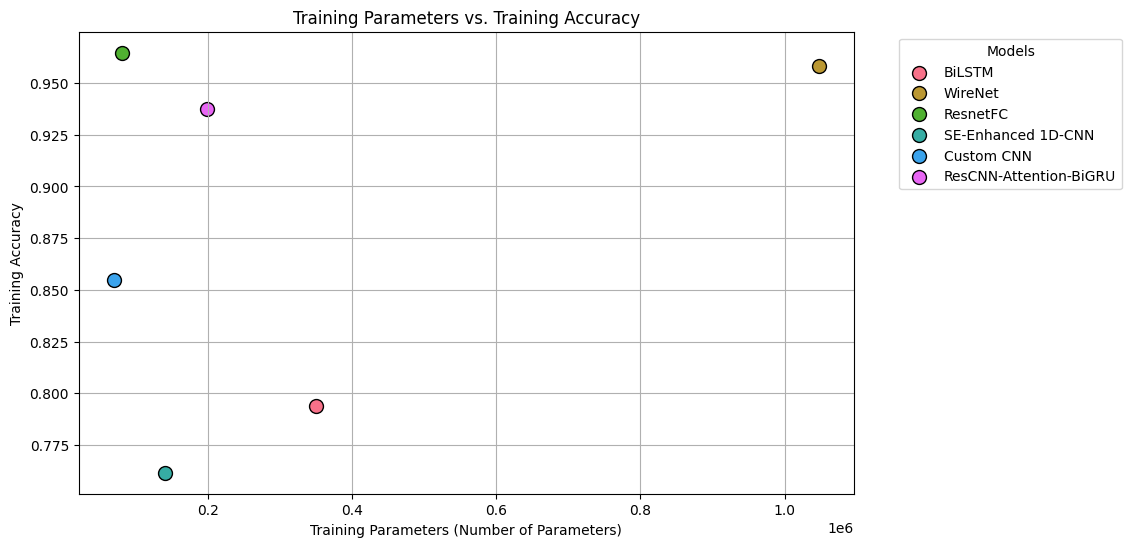

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

# Ensure the models are trained before extracting these values
parameters = [
    model1.count_params(),
    model2.count_params(),
    model5.count_params(),
    model6.count_params(),
    model7.count_params(),
    model8.count_params()
]

colors = sns.color_palette("husl", len(model_names))  # Generate unique colors for each model

# Set figure
plt.figure(figsize=(10, 6))

# Plot each model with a different color
for i, model in enumerate(model_names):
    plt.scatter(parameters[i], train_accuracies[i], color=colors[i], s=100, edgecolor='black', label=model)

# Labels & Title
plt.xlabel("Training Parameters (Number of Parameters)")
plt.ylabel("Training Accuracy")
plt.title("Training Parameters vs. Training Accuracy")

# Add legend
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

In [ ]:
# Extract training accuracies
accuracies2 = [
    accuracy1,
    accuracy2,
    accuracy5,
    accuracy6,
    accuracy7,
    accuracy8
]

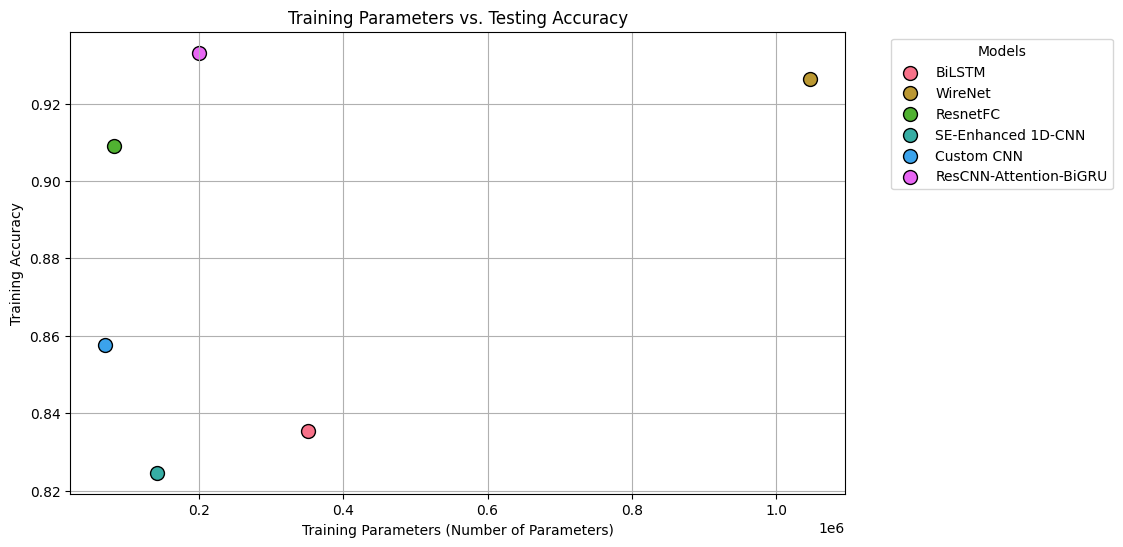

In [ ]:
colors = sns.color_palette("husl", len(model_names))

# Set figure
plt.figure(figsize=(10, 6))

# Plot each model with a different color
for i, model in enumerate(model_names):
    plt.scatter(parameters[i], accuracies2[i], color=colors[i], s=100, edgecolor='black', label=model)

# Labels & Title
plt.xlabel("Training Parameters (Number of Parameters)")
plt.ylabel("Training Accuracy")
plt.title("Training Parameters vs. Testing Accuracy")

# Add legend
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

/tmp/ipython-input-100-3862867814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=parameters, palette="husl")


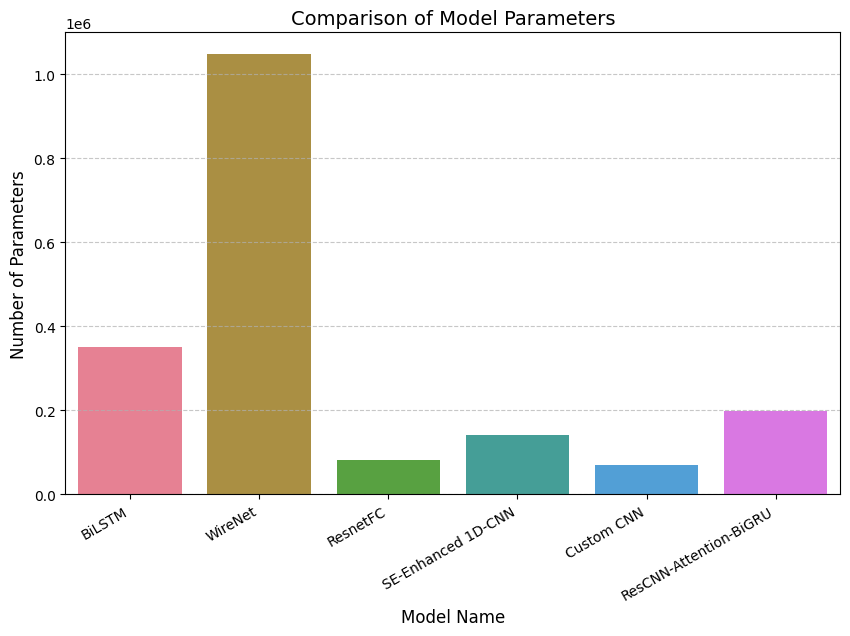

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=parameters, palette="husl")

# Labels and title
plt.xlabel("Model Name", fontsize=12)
plt.ylabel("Number of Parameters", fontsize=12)
plt.title("Comparison of Model Parameters", fontsize=14)
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()